# Image Week - Day 1 - Exercice 1 - Images et Filtrage

<a target="_blank" href="https://colab.research.google.com/github/leclairearthur/imageweek/blob/main/exo1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<br/><br/>

In this practical session, you have to complete the code regions marked ``### ... ###``.

In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt

def rgb2gray(u):
    return 0.2989 * u[:,:,0] + 0.5870 * u[:,:,1] + 0.1140 * u[:,:,2]

# viewimage
import tempfile
import IPython
from skimage.transform import rescale
def viewimage(im, normalize=True,z=2,order=0,titre='',displayfilename=False):
    imin= np.array(im).astype(np.float32)
    channel_axis = 2 if len(u0.shape)>2 else None
    imin = rescale(imin, z, order=order, channel_axis=channel_axis)
    if normalize:
        imin-=imin.min()
        if imin.max()>0:
            imin/=imin.max()
    else:
        imin=imin.clip(0,255)/255
    imin=(imin*255).astype(np.uint8)
    filename=tempfile.mktemp(titre+'.png')
    if displayfilename:
        print (filename)
    plt.imsave(filename, imin, cmap='gray')
    IPython.display.display(IPython.display.Image(filename))

# alternative viewimage if the other one does not work:
def Viewimage(im,dpi=100,cmap='gray'):
    plt.figure(dpi=dpi)
    if cmap is None:
        plt.imshow(im)
    else:
        plt.imshow(im,cmap=cmap)
    plt.axis('off')
    plt.show()

!wget https://perso.telecom-paristech.fr/aleclaire/mva/tpdeblur.zip
!unzip tpdeblur.zip

--2026-02-02 09:39:50--  https://perso.telecom-paristech.fr/aleclaire/mva/tpdeblur.zip
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 774047 (756K) [application/zip]
Saving to: ‘tpdeblur.zip’

tpdeblur.zip        100%[===================>] 755.91K  1.30MB/s    in 0.6s    

2026-02-02 09:39:52 (1.30 MB/s) - ‘tpdeblur.zip’ saved [774047/774047]

Archive:  tpdeblur.zip
   creating: im/
  inflating: im/simpson512crop.png   
  inflating: im/simpson512.png       
  inflating: im/room.png             
  inflating: im/tshirt.png           
   creating: kernels/
  inflating: kernels/kernel_0.png    
  inflating: kernels/kernel_1.png    
  inflating: kernels/kernel_10.png   
  inflating: kernels/kernel_11.png   
  inflating: kernels/kernel_2.png    
  inflating: kernels/kernel_

(128, 128)


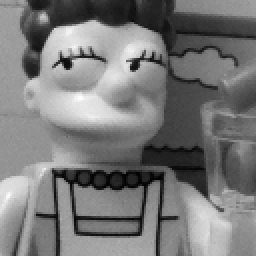

In [2]:
# Ouvrir l'image
u0 = rgb2gray(plt.imread('im/simpson512.png'))
u0 = u0[135:263,40:168]
M,N = u0.shape

# Ajuster le paramètre z par défaut de la fonction viewimage
#  pour que les images s'affichent à une taille raisonnable.
print(u0.shape)
viewimage(u0)

**QUESTION :** En utilisant la fonction `numpy.random.randn`, ajouter à $u_0$ un bruit blanc gaussien d'écart-type $\sigma$. Afficher l'image bruitée.

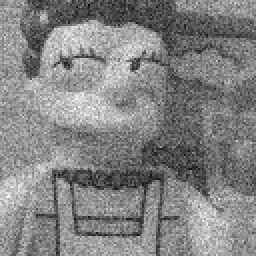

In [4]:
sigma = 0.1  # écart-type
v = u0 + sigma * np.random.randn(M,N)

viewimage(v)

**QUESTION :** Calculer les dérivées discrètes $\partial_1 u_0$, $\partial_2 u_0$.

(En adoptant des conditions de bord périodiques, on pourra utiliser ``np.roll``.)

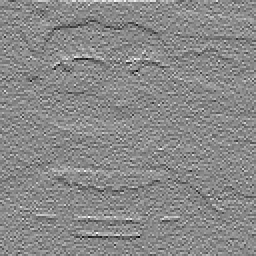

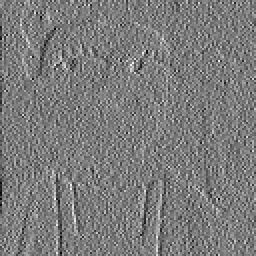

In [5]:
### ... ###
v_shifted_x = np.roll(v, 1, axis = 0)
d1u = v_shifted_x - v

v_shifted_y = np.roll(v, 1, axis = 1)
d2u = v_shifted_y - v


viewimage(d1u)
viewimage(d2u)

**QUESTION :** Calculer la transformée de Fourier discrète de $u_0$ et afficher son module en échelle logarithmique (i.e. afficher $\log(1+|\hat{u}|)$).

In [ ]:
### ... ###

viewimage(spu)

**QUESTION :** Calculer les deux dérivées de l'image en effectuant des convolutions (via la FFT).

In [ ]:
### ... ###

**QUESTION :** En utilisant les fréquences $\xi, \zeta$ définies dans le code, calculer le filtre de Wiener $h_{\lambda}$ vu en cours. Afficher son spectre centré.

On rappelle que $h_{\lambda}$ est défini par sa transformée de Fourier :
$$\forall (\xi,\zeta) \in \Omega, \quad
    \hat{h}_\lambda(\xi,\zeta) = \frac{1}{1 + \lambda \ \hat{L}(\xi,\zeta) } $$
où
$$ \hat{L}(\xi,\zeta) = 4 \left( \sin^2\left(\pi \frac{\xi}{M}\right) + \sin^2 \left(\pi \frac{\zeta}{N}\right) \right) .$$

In [ ]:
# Filtre de Wiener
xi = np.arange(M)
ind = (xi>M/2)
xi[ind] = xi[ind]-M
zeta = np.arange(N)
ind = (zeta>N/2)
zeta[ind] = zeta[ind]-N
Xi,Zeta = np.meshgrid(xi,zeta)

lam = 2
fh = ### ... ###
h = ifft2(fh).real

plt.figure(dpi=100)
plt.imshow(fftshift(fh),cmap='gray')
plt.axis('off')
plt.title(r'Spectre de $h_{\lambda}$')
plt.show()

**QUESTION.** Utiliser le filtre $h_{\lambda}$ pour filtrer l'image $v$.
Comparer l'image bruitée $v$ et l'image débruitée $u$.


$$\forall (\xi,\zeta) \in \Omega, \quad
    \hat{u}_*(\xi,\zeta) = \hat{h}_\lambda(\xi,\zeta) \hat{v}(\xi,\zeta) = \frac{\hat{v}(\xi,\zeta)}{1 + \lambda \ \hat{L}(\xi,\zeta) } $$


In [ ]:
### ... ###

plt.figure(dpi=100, figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(v,cmap='gray')
plt.axis('off')
plt.title('Image bruitée')
plt.subplot(1,2,2)
plt.imshow(u,cmap='gray')
plt.axis('off')
plt.title('Image débruitée')
plt.show()

**QUESTION :** Écrire une fonction permettant de calculer le PSNR.

Comparer les PSNR de $u$ et $v$ par rapport à l'image $u_0$.

Utiliser cette fonction PSNR pour essayer de trouver une meilleure valeur de $\lambda$.

In [ ]:
def psnr(uref,ut,MAX=1):
    ### ... ###

print('PSNR(u0,u) =', psnr(u0,u), 'dB')
print('PSNR(u0,v) =', psnr(u0,v), 'dB')

### Floutage et défloutage

On charge un noyau de flou de bouger.

In [ ]:
kt = np.loadtxt('kernels/kernel8.txt')

plt.imshow(kt,cmap='gray')
plt.title('Noyau de flou')
plt.show()

Pour pouvoir faire les convolutions avec la FFT, on plonge le noyau de flou dans une image de bonnes dimensions, et on le centre en (0,0).

In [ ]:
k = np.zeros((M,N))
(m,n) = kt.shape

k[0:m,0:n] = kt/np.sum(kt)
k = np.roll(k,(-int(m/2),-int(n/2)),(0,1))

viewimage(fftshift(k))

**QUESTION :** Calculer une réalisation du modèle de dégradation
$$ v = k*u_0 + w $$
où $w$ est un bruit blanc gaussien d'écart-type $\sigma>0$.

In [ ]:
sigma = .01

### ... ###

viewimage(v)

**QUESTION :** Essayer de déflouter l'image en inversant la convolution dans le domaine de Fourier.

Reprenez l'expérience en enlevant le bruit ($\sigma = 0$). Qu'en déduisez-vous ?

In [ ]:
### ... ###

viewimage(u)

**QUESTION :** Déflouter l'image en utilisant le filtre linéaire lié à la régularisation de Tychonov. Elle correspond au filtre $h_\lambda$ cette fois défini par
$$\forall (\xi,\zeta) \in \Omega, \quad
    \hat{h}_\lambda(\xi,\zeta) = \frac{\overline{k(\xi,\zeta)}}{|\hat{k}(\xi,\zeta)|^2 + \lambda \ \hat{L}(\xi,\zeta) } $$

Faites varier la valeur de $\lambda$ et essayez de trouver une valeur optimale.

In [ ]:
lam = .01

### ... ###

viewimage(u)

**QUESTION :** Réduire une l'image suivante en sous-échantillonnant par 2, 3 ou 4 dans les deux directions.

In [ ]:
u = plt.imread('im/tshirt.png')
ud2 = ### ... ###
ud3 = ### ... ###
ud4 = ### ... ###

viewimage(u)
viewimage(ud2)
viewimage(ud3)
viewimage(ud4)

**QUESTION :** Afficher les modules transformées de Fourier des images correspondantes.

In [ ]:
### ... ###

**QUESTION BONUS :** Adapter la méthode de débruitage et déflouage ci-dessus sur une image couleur.

In [ ]:
u0 = plt.imread('im/simpson512.png')
u0 = u0[135:263,40:168,:]
M,N,nc = u0.shape

viewimage(u0)

### ... ###